# Linear function for a given dataset using Gradient Descent

In [58]:
# Import libraries as per need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#define matplotlib
%matplotlib inline

In [7]:
df = pd.read_csv('math_cs_score.csv')

In [60]:
df.head()

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83


In [71]:
# Divide the columns into seperate numpy arrays.
# maths: X-axis
# cs: Y-axis
# Formula: y = mx + c, where m = slope(co-efficient) and c = intercept
# Note: length of maths array and cs array should be same.
x_math = np.array(df.math)
y_cs = np.array(df.cs)

Text(0, 0.5, 'Computer Science Score')

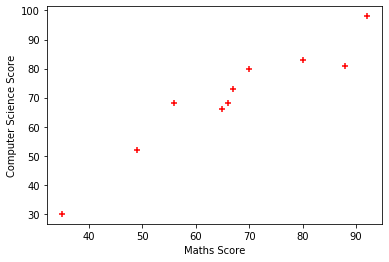

In [72]:
# Plotting the current data points on a graph
plt.scatter(df['math'], df['cs'], marker="+", color="Red")
plt.xlabel('Maths Score')
plt.ylabel('Computer Science Score')

In [186]:
m_current = c_current = 0

In [187]:
total_iterations = 1000000

In [188]:
# Size of dataset: size of X values

In [189]:
n = len(x_math)

In [190]:
learning_rate = 0.0002

In [201]:
# In this Loop we will try and reduce the cost function wrt to slope(m) and intercept(c), by taking their respective derivateives.
# Once the derivative is opbtained, we will then update the new "m" and "c" value by calculating it with the learning curve respectively.
# Once the new "m" and "c" are obtained the y_prediction is also made to get a new cost function
# This method is continued, until the cost reduces and then shows similar data for cusecutively 5 to 10 data sets(for example)
# We keep iterating over this method to get our solution and hence sometimes we update the learning curve or increase/decrease total iterations.

# The cost function here is calculated as a mean squared error, to remove negative values.
prev_cost  = 0
for i in range(total_iterations):
    y_predict = m_current * x_math + c_current

    cost = (1/n)* sum([value**2 for value in (y_cs - y_predict)]) # Calculating slope
    
    m_derivative = -(2/n)*sum(x_math * (y_cs - y_predict)) # Calculating derivative of slope
    c_derivative = -(2/n)*sum(y_cs-y_predict) # Calculating derivative of intercept
    
    m_current = m_current - learning_rate * m_derivative # Calculating new slope as per learning rate and derivative
    c_current = c_current - learning_rate * c_derivative # Calculating new intercept as per learning rate and derivative
    
    if math.isclose(cost, prev_cost, rel_tol=1e-20):
        break
    prev_cost = cost

In [233]:
df.head()

,name,math,cs,y_predict
0,david,92,98,95.546991
1,laura,56,68,58.908422
2,sanjay,88,81,91.476039
3,wei,70,80,73.156754
4,jeff,80,83,83.334135


In [238]:
df.to_csv('math_cs_score_predicted_global_minima.csv')

In [235]:
# Coefficient
print(m_current)

1.017738034475287


In [236]:
# intercept
print(c_current)

1.9150919894776326


In [237]:
# Can be iterated more to make it better.
# Also Stochastic Gradient Descent can also be implemented to reduce iterations.

# End